In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
from pathlib import Path
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)

In [43]:
data_path = Path("../data/processed/clean/clean_events.csv")
if not data_path.exists():
    raise FileNotFoundError(f"Data file not found at {data_path}")

df = pd.read_csv(data_path)
print(f"Data loaded with {df.shape[0]} rows and {df.shape[1]} columns.")


Data loaded with 490 rows and 9 columns.


In [ ]:
# Basic Dataset Check -- Should be 0 all the way arounf

df.info()

#Column Information
print("\nColumn Information:")
for col in df.columns:
    non_null = df[col].notnull().sum()
    null_pct = df[col].isnull().mean() * 100

    print(f"{col:15} | Non-null: {non_null:>6} | Null %: {null_pct:>5.2f} | ")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   event          490 non-null    int64 
 1   meet           490 non-null    object
 2   stroke         490 non-null    object
 3   gender         490 non-null    object
 4   distance       490 non-null    int64 
 5   source_file    490 non-null    object
 6   meet_category  490 non-null    object
 7   records        490 non-null    object
 8   entries        490 non-null    object
dtypes: int64(2), object(7)
memory usage: 34.6+ KB

Column Information:
event           | Non-null:    490 | Null %:  0.00 | 
meet            | Non-null:    490 | Null %:  0.00 | 
stroke          | Non-null:    490 | Null %:  0.00 | 
gender          | Non-null:    490 | Null %:  0.00 | 
distance        | Non-null:    490 | Null %:  0.00 | 
source_file     | Non-null:    490 | Null %:  0.00 | 
meet_category   | Non-null:

In [44]:
# Sample Data

display(df.head())

sample_event = df.iloc[1]

records = ast.literal_eval(sample_event['records'])
entries = ast.literal_eval(sample_event['entries'])

print("Records:")
for record in records:
    print(f"  - {record}")

print("\nEntries:")
for entry in entries:
    print(f"  - {entry}")

,event,meet,stroke,gender,distance,source_file,meet_category,records,entries
0,1,2021 Speedo Summer Championships West Meet...,Butterfly,Women,200,2021-speedo-summer-championships---west---meet...,national-championships,"[['American', '2:04.14', '7/30/2009', 'Mary De...","[[1, 'Kozan, Justina', 17, 'Mission Viejo Nada..."
1,2,2021 Speedo Summer Championships West Meet...,Butterfly,Men,200,2021-speedo-summer-championships---west---meet...,national-championships,"[['World', '1:50.73', '7/24/2019', 'Kristof Mi...","[[1, 'Julian, Trenton', 22, 'Rose Bowl Aquatic..."
2,3,2021 Speedo Summer Championships West Meet...,Freestyle,Women,100,2021-speedo-summer-championships---west---meet...,national-championships,"[['World', '51.71', '7/23/2017', 'Sarah Sjostr...","[[1, ""O'Dell, Teagan"", 14, 'Irvine Novaquatics..."
3,4,2021 Speedo Summer Championships West Meet...,Freestyle,Men,100,2021-speedo-summer-championships---west---meet...,national-championships,"[['World', '46.91', '7/30/2009', 'Cesar Cielo'...","[[1, 'Novak, Jesse', 26, 'Irvine Novaquatics-C..."
4,8,2021 Speedo Summer Championships West Meet...,Freestyle,Women,200,2021-speedo-summer-championships---west---meet...,national-championships,"[['World', '1:52.98', '7/29/2009', 'Federica P...","[[1, 'Kozan, Justina', 17, 'Mission Viejo Nada..."


Records:
  - ['World', '1:50.73', '7/24/2019', 'Kristof Milak', 'HUN']
  - ['American', '1:51.51', '7/29/2009', 'Michael Phelps', 'USA']
  - ['U.S. Open', '1:52.20', '7/2/2008', 'Michael Phelps', 'Club Wolverine']

Entries:
  - [1, 'Julian, Trenton', 22, 'Rose Bowl Aquatics-CA', '1:57.35', '1:54.71']
  - [2, 'Homans, Harry', 21, 'Trojan Aquatics Swim Club-CA', '1:59.67', '1:59.32']
  - [3, 'Lustig, Jack', 18, 'Schroeder YMCA Swim Team-WI', '2:00.61', '2:00.22']
  - [4, 'Louser, Jason', 20, 'California Aquatics-PC', '2:01.04', '2:00.66']
  - [5, 'Reiter, Drew', 17, 'Greater Des Moines YMCA-IA', '2:03.61', '2:01.98']
  - [6, 'Keough, Patrick', 17, 'King Aquatic Club-PN', '2:03.69', '2:02.93']
  - [7, 'Hochwalt, Michael', 15, 'Spokane Waves Aquatic Team-IE', '2:02.27', '2:03.46']
  - [8, 'Boylan, David', 20, 'Craw(cid:976)ish Aquatics-LA', '2:02.81', '2:04.47']
  - [9, 'Naughton, Haakon', 17, 'Riptide-MN', '2:03.95', '2:02.29']
  - [10, 'Bonilla Flores, Roberto', 16, 'The Woodlands Swim T

In [47]:
# Helper functions for counting records and entries
def count_records(records_str):
    try:
        records = ast.literal_eval(records_str)
        return len(records)
    except (ValueError, SyntaxError):
        return 0

def count_entries(entries_str):
    try:
        entries = ast.literal_eval(entries_str)
        return len(entries)
    except (ValueError, SyntaxError):
        return 0
    
# Add columns for info
df['num_entries'] = df['entries'].apply(count_entries)
df['num_records'] = df['records'].apply(count_records)

print("Basic Stats:")
print(f"Total Events: {df.shape[0]}")
print(f"Total Records: {df['num_records'].sum()}")
print(f"Total Entries: {df['num_entries'].sum()}")
print(f"Unique Meets: {df['meet'].nunique():,}")
for meet in df['meet'].unique():
    print(f"  - {meet}: {df[df['meet'] == meet].shape[0]:,} events")
print(f"Meet Categories: {df['meet_category'].nunique():,}")
for meet in df['meet_category'].unique():
    print(f"  - {meet}: {df[df['meet_category'] == meet].shape[0]:,} events")


Basic Stats:
Total Events: 490
Total Records: 1376
Total Entries: 15215
Unique Meets: 16
  - 2021 Speedo Summer Championships   West   Meet Results: 24 events
  - Phillips 66 Intl Team Trials  : 34 events
  - 2021 Speedo Summer Championships East  : 25 events
  - 2023 Tyr Pro Championships Complete Meet Results: 28 events
  - Complete Meet Results 2023 Tyr Pro Swim Series Fort Lauderdale: 34 events
  - 2022 Tyr Pss Mv: 28 events
  - Knoxville: 28 events
  - 2023 Tyr Pro Swim Series Mission Viejo: 34 events
  - Santa Clara   Final Results: 42 events
  - Tyr Pss Richmond Full Meet Results: 27 events
  - 2023 Tyr Pro Swim Series Knoxville Meet Results: 34 events
  - 2025 Pss Westmont Complete Meet Results: 34 events
  - 2022 Tyr Pro Swim Series San Antonio   Complete Meet Results: 28 events
  - 2023 Tyr Pro Swim Series Westmont: 34 events
  - U S Olympic Team Trials   Wave Ii Complete Meet Results: 28 events
  - 2020 Us Olympic Team Trials   Complete Wave I Results: 28 events
Meet Categor

In [48]:
# Basic stats for columns
print("\nBasic Stats for Columns:")
print("num_entries:")
print(df["num_entries"].describe())
print("Distribution of events by type:")
print(df.groupby(['gender', 'distance', 'stroke']).size().sort_values(ascending=False))


Basic Stats for Columns:
num_entries:
count    490.000000
mean      31.051020
std       17.721299
min        2.000000
25%       19.000000
50%       28.000000
75%       40.000000
max      109.000000
Name: num_entries, dtype: float64
Distribution of events by type:
gender  distance  stroke      
Men     50        Freestyle       17
Women   50        Freestyle       17
Men     400       IM              16
Women   200       Freestyle       16
                  Breaststroke    16
                  Backstroke      16
        100       Freestyle       16
                  Butterfly       16
                  Breaststroke    16
                  Backstroke      16
        200       IM              16
        400       Freestyle       16
                  IM              16
        200       Butterfly       16
Men     400       Freestyle       16
        200       IM              16
                  Freestyle       16
                  Butterfly       16
                  Breaststroke    16
 

In [ ]:
knockout_mask = df['stroke'].str.contains('knockout', case=False, na=False)
print("\nKnockout Events:")
print(f"Total Knockout Events: {knockout_mask.sum()}")
print(df[knockout_mask]['num_entries'])
print(df[knockout_mask]['meet'].value_counts())

#df['stroke'] = df['stroke'].astype(str).str.replace(' Knockout', '', regex=False)
#df['stroke'] = df['stroke'].astype(str).str.replace('(cid:976)', 'f', regex=False)

print(df.groupby(['gender', 'distance', 'stroke']).size().sort_values(ascending=False))






Knockout Events:
Total Knockout Events: 0
Series([], Name: num_entries, dtype: int64)
Series([], Name: count, dtype: int64)
[<class 'str'>]
gender  distance  stroke      
Men     50        Freestyle       17
Women   50        Freestyle       17
Men     200       IM              16
                  Freestyle       16
Women   200       Breaststroke    16
        100       Breaststroke    16
                  Backstroke      16
        200       Freestyle       16
                  IM              16
Men     400       IM              16
                  Freestyle       16
Women   200       Backstroke      16
        100       Freestyle       16
        400       Freestyle       16
Men     200       Breaststroke    16
                  Backstroke      16
        100       Freestyle       16
Women   400       IM              16
Men     100       Breaststroke    16
                  Backstroke      16
        200       Butterfly       15
Women   200       Butterfly       15
Men     100   

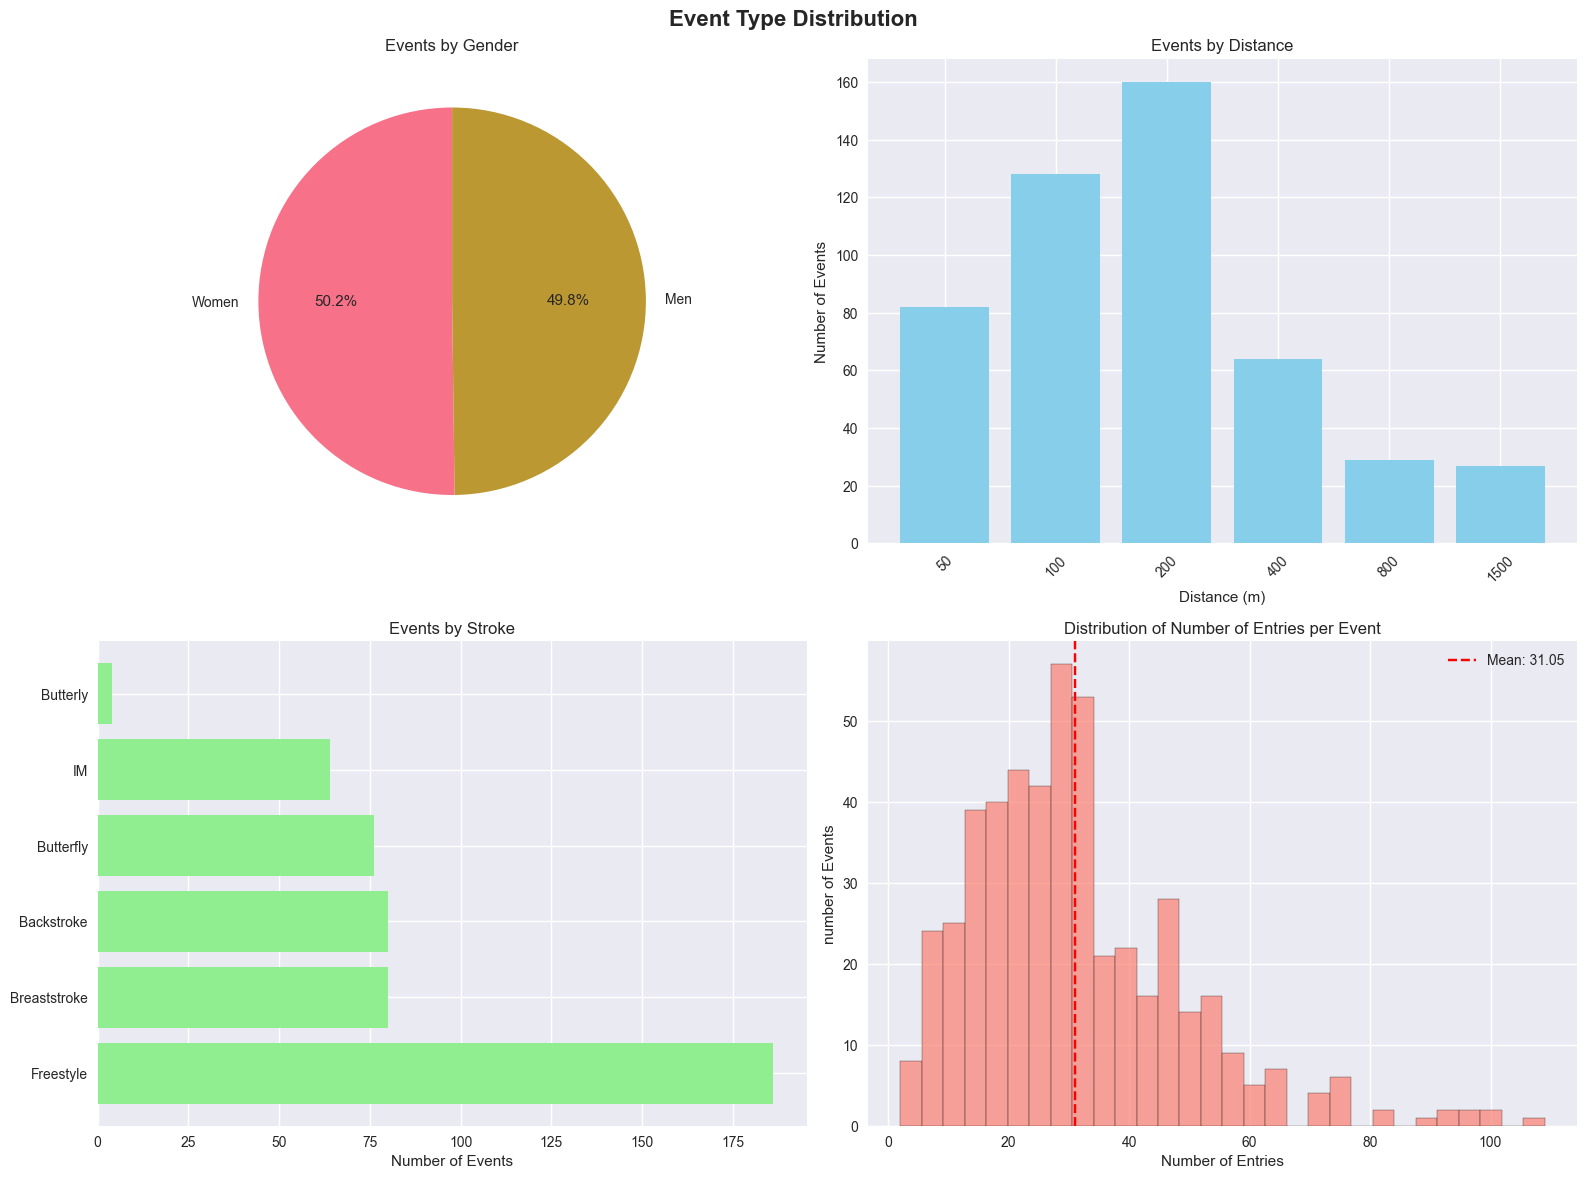

In [34]:
# Event Type Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Event Type Distribution', fontsize=16, fontweight='bold')

gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Events by Gender')

distance_counts = df['distance'].value_counts().sort_index()
axes[0, 1].bar(distance_counts.index.astype(str), distance_counts.values, color='skyblue')
axes[0, 1].set_title('Events by Distance')
axes[0, 1].set_xlabel('Distance (m)')
axes[0, 1].set_ylabel('Number of Events')
axes[0, 1].tick_params(axis='x', rotation=45)

stroke_counts = df['stroke'].value_counts()
axes[1, 0].barh(stroke_counts.index.astype(str), stroke_counts.values, color='lightgreen')
axes[1, 0].set_title('Events by Stroke')
axes[1, 0].set_xlabel('Number of Events')

axes[1, 1].hist(df['num_entries'], bins=30, alpha=0.7,color='salmon', edgecolor='black')
axes[1, 1].set_title('Distribution of Number of Entries per Event')
axes[1, 1].set_xlabel('Number of Entries')
axes[1, 1].set_ylabel('number of Events')
axes[1, 1].axvline(df['num_entries'].mean(), color='red', linestyle='--', label=f'Mean: {df["num_entries"].mean():.2f}')

axes[1, 1].legend()

plt.tight_layout()
plt.show()